In [4]:
import os
import math
import sympy as sp
import numpy as np
from PIL import Image

IMAGE_FILE = 'output_image.png'
IMAGE_WIDTH = 2000
IMAGE_HEIGHT = 1200

# Declare sympy symbols
x, y, v, s, u = sp.symbols('x y v s u')

sp.init_printing()


In [13]:
Ps = y - (50-s)/700 + sp.cos(7*s)/50

Qs = x + 7/10 - (50-s)/75 + sp.cos(5*s)/50

Ps, Qs

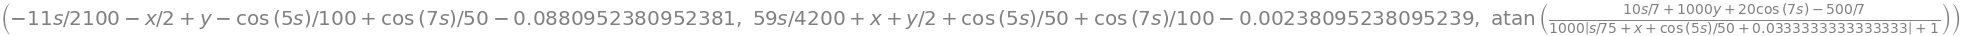

In [14]:
Us = Ps - Qs/2

Vs = Qs + Ps/2

Ks = sp.atan((1000*Ps)/(1+1000*abs(Qs)))

Us, Vs, Ks

In [15]:
Nvs1 = sp.cos((15-3*v)**s * 10**(-s) * (1+3*sp.cos(10*s)) * (sp.cos(2*s**2)*x + sp.sin(2*s**2)*y) + 6*sp.cos((420-84*v)**s * 250**(-s) * (sp.cos(7*s**2)*x + sp.sin(7*s**2)*y)) + 2*sp.cos(5*s))
                                                                                                                                                                                          
                                                                                                                                                                                          
Nvs2 = sp.cos((15-3*v)**s * 10**(-s) * (1+3*sp.cos(10*s)) * (sp.cos(2*s**2)*y - sp.sin(2*s**2)*x) + 6*sp.cos((420-84*v)**2 * 250**(-s) * (sp.cos(8*s**2)*x + sp.sin(8*s**2)*y)) + 2*sp.cos(5*s))

Nvs1*Nvs2

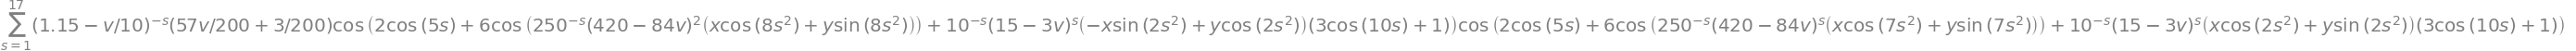

In [36]:
Evarg = ((3+57*v)/200) * (23/20 - v/10)**(-s) * Nvs1*Nvs2
Ev = sp.Sum(Evarg, (s,1,17))

Ev

In [17]:
E0 = Ev.subs(v,0).doit()
E1 = Ev.subs(v,1).doit()


Rv = sp.exp(-sp.exp(v * (abs( y - 9/10 + (1/3)*(x-1/2)**2 ) ) - 1/4 + (53/10)*E0 + (1/10)*E1 ))

Rv

In [18]:
Cs = (3 + s/50 ) * abs(Us)**(7/4 + ((70+s)/300)*Vs) + ((90+s)/200)*Vs**2

Cs

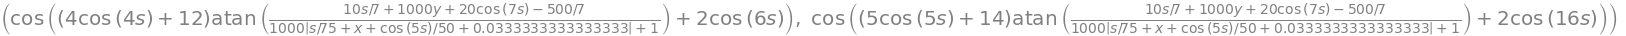

In [42]:
Ts = sp.cos((12 + 4*sp.cos(4*s))*Ks + 2*sp.cos(6*s))
Ws = sp.cos((14 + 5*sp.cos(5*s))*Ks + 2*sp.cos(16*s))

Ts, Ws

In [35]:
Js = sp.exp(-sp.exp(-5000*(s+19/2)) - sp.exp(abs(400 * Cs + 2*sp.cos((17+4*sp.cos(14*s))*Ks + 2*sp.cos(16*s)) + 2*sp.cos((25+6*sp.cos(10*s)) * Ks + 2*sp.cos(19*s)) - 560 + 8*s)) -40 ) * (1 - sp.exp(-sp.exp(500*(x + 8/5 - (1/2)*((50-s)/75)**2 + Ps/2 - (50-s)/50))) - sp.exp(500*Us))

Js            

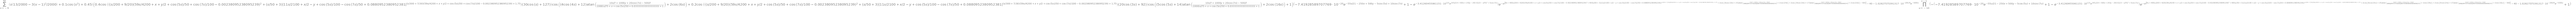

In [55]:
Ju = Js.subs(s,u).doit()

Lvprodarg =  (1-Ju)

Lvprod = sp.Product(Lvprodarg, (u, -10, s-1))

Lvsumarg = Lvprod * Js * (9/20 + ((13-3*(v-1)**2)/2000)*s + (1/10)*sp.cos(s**2)) * (1 + (2/5)*sp.cos((127 + 30*sp.cos(s)) * Cs) * Ts + (1/5)*sp.cos((92+20*sp.cos(3*s))*Cs) * Ws)

Lv = sp.Sum(Lvsumarg, (s, -9, 50))


Lv

In [60]:
Hvprodarg = 1 - Js

Hvprod = sp.Product(Hvprodarg, (s, -9, 50))

R70 = Rv.subs(v, 70).doit()
Rn5 = Rv.subs(v, -5).doit()
E0 = Ev.subs(v, 0).doit()

Hv = ( Lv * (v**2+v+14)/20 + (3*v**2-3*v+16)/20 * (1+y/10) * Hvprod ) * (1 - R70) + R70 * ( 1 - (3/10)*Rn5 - (3/10)*E0 ) * (y/10 + 91/100 + (1/30)*(x-1/2)**2)

Hv

                                                                                                                       ↪
                                                                                                                       ↪
                                                                                                                       ↪
                                                                                                                       ↪
                                                                                                                       ↪
                                                                                                                       ↪
                                                                                                                       ↪
                                                                                                                       ↪
                                

In [61]:
Fx = sp.floor(255 * sp.exp(sp.exp(-1000*x) * abs(x) ** (sp.exp(-sp.exp(1000*(x-1))))))

Fx

In [ ]:
H0 = Hv.subs(v,0).doit()
H1 = Hv.subs(v,1).doit()
H2 = Hv.subs(v,2).doit()

def color_function(x, y):
    # Example: combine parts into an RGB tuple (replace with actual color logic)
    r = int(x) % 256
    g = int(x) % 256
    b = int(y) % 256
    return (r, g, b)


def generate_image():
    image = Image.new('RGB', (IMAGE_WIDTH, IMAGE_HEIGHT))

    # Apply color_function to each pixel and set the pixel color
    for y in range(IMAGE_HEIGHT):
        for x in range(IMAGE_WIDTH):
            color = color_function(x, y)
            image.putpixel((x, y), color)

    # Save the generated image
    image.save(IMAGE_FILE)
    print(f"Generated and saved image: {IMAGE_FILE}")

def main():
    if os.path.exists(IMAGE_FILE):
        print(f"Image {IMAGE_FILE} already exists. Overwriting...")

    generate_image()

if __name__ == "__main__":
    main()

